# WUM PD 5 Szymon Rećko

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score,davies_bouldin_score

In [5]:
df=pd.read_csv("clustering.csv",names=["x","y"])

<AxesSubplot:xlabel='x', ylabel='y'>

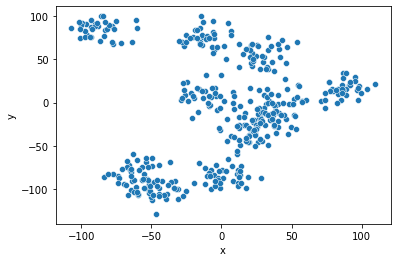

In [6]:
sns.scatterplot(x=df["x"],y=df["y"])

Ponieważ dane są dwuwymiarowe możemy przedstawić je na wykresie i intuicyjnie domyślać się jaka może być liczba  klastrów. Moim strzałem jest około 7.

In [7]:
def plot_clusters(X,method):
    fig, axs = plt.subplots(3, 4,figsize=(20,12))
    plt.figure(figsize=(10,7))
    for i in range(0,3):
        for j in range(0,4):
            n_clusters=i*4+j+1
            model = method(n_clusters=n_clusters, random_state=0)
            model.fit(X)
            y_pred = model.predict(X)
            axs[i,j].scatter(X["x"], X["y"], c=y_pred, s=30, cmap='viridis')
            centers = model.cluster_centers_
            axs[i,j].scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
            axs[i,j].set_title("k="+str(n_clusters))

Funkcja do przedstawienia metody dla różnej liczby klastrów.

## Kmeans i metoda sillhoutte

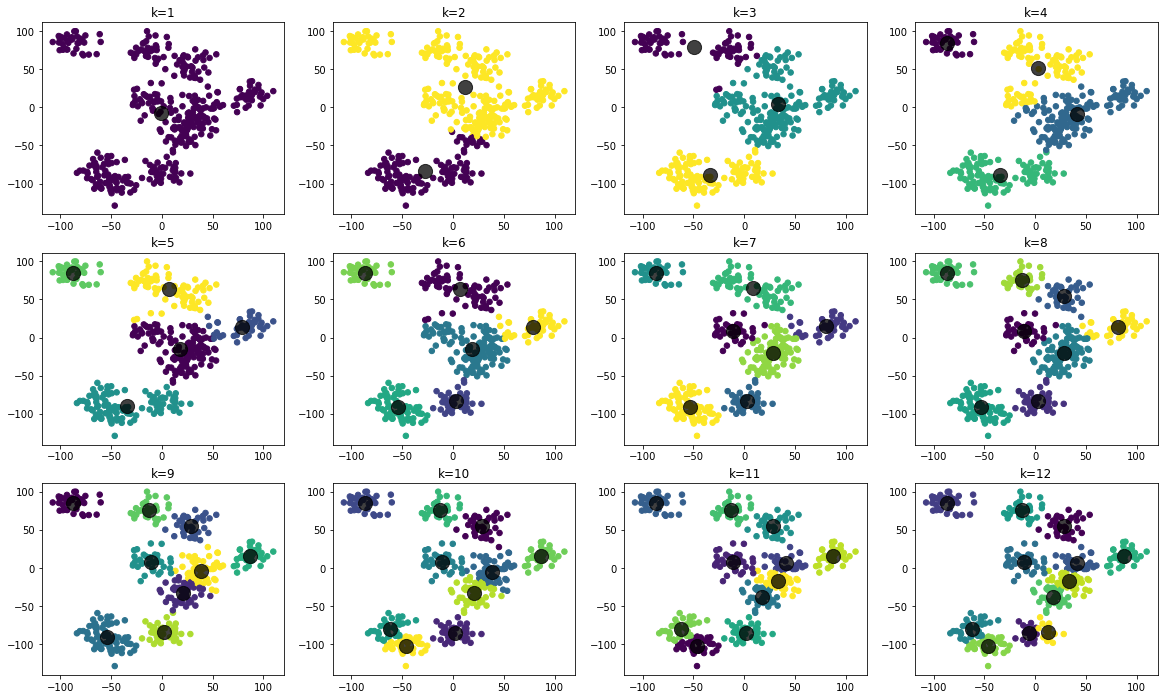

<Figure size 720x504 with 0 Axes>

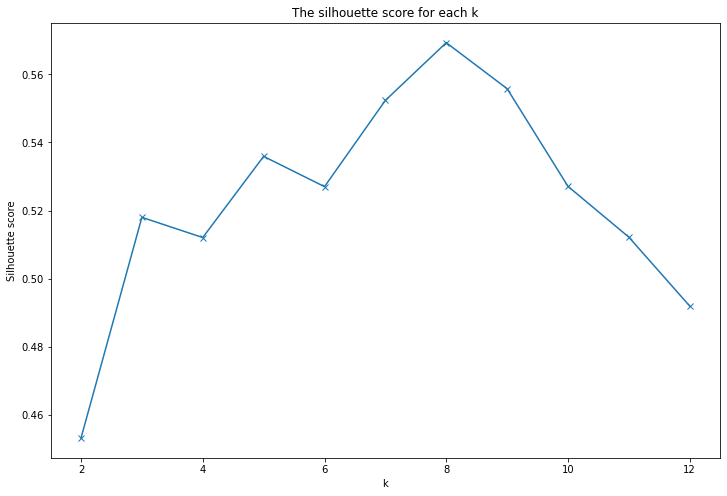

In [8]:
plot_clusters(df,KMeans)
scores = []
for i in range(2, 13):
    model = KMeans(n_clusters=i)
    y_pred = model.fit_predict(df)
    scores.append(silhouette_score(df, y_pred))
plt.figure(figsize=(12,8))
x = list(range(2, 13))
plt.plot(x, scores, 'x-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('The silhouette score for each k')
plt.show()

Używając metody sillhoutte wnioskujemy że dla Kmeans 8 klastrów jest najlepsze, czyli podobnie jak "strzelałem".

## Kmedoids i indeks Daviesa–Bouldina

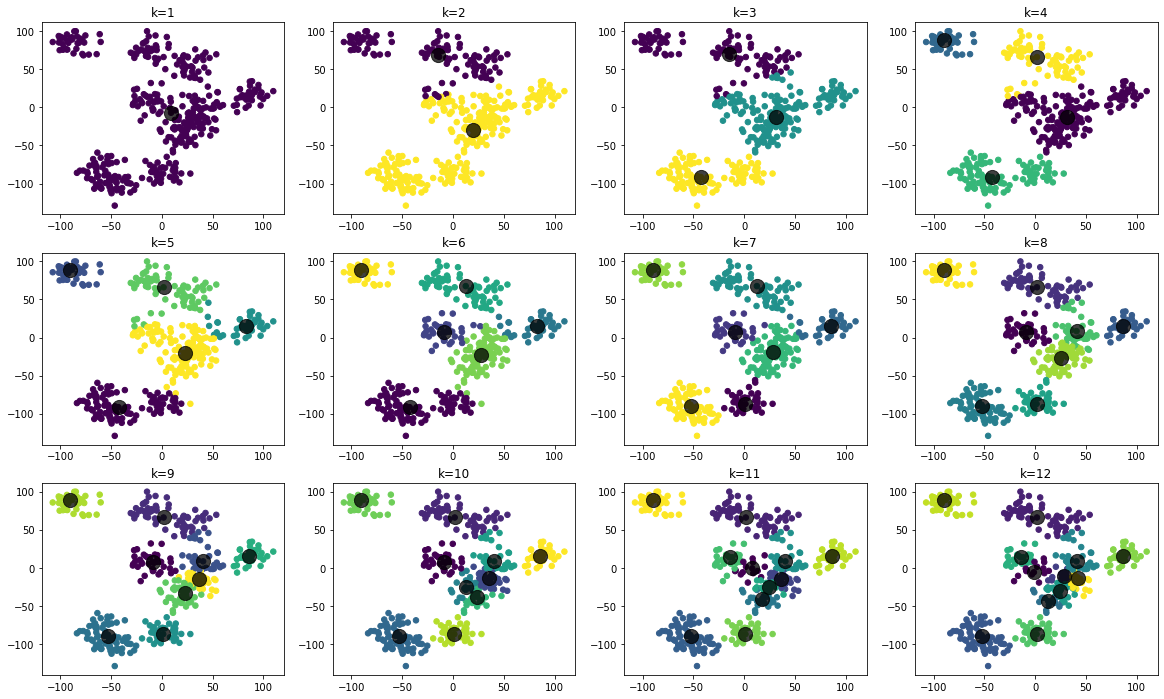

<Figure size 720x504 with 0 Axes>

In [40]:
plot_clusters(df,KMedoids)

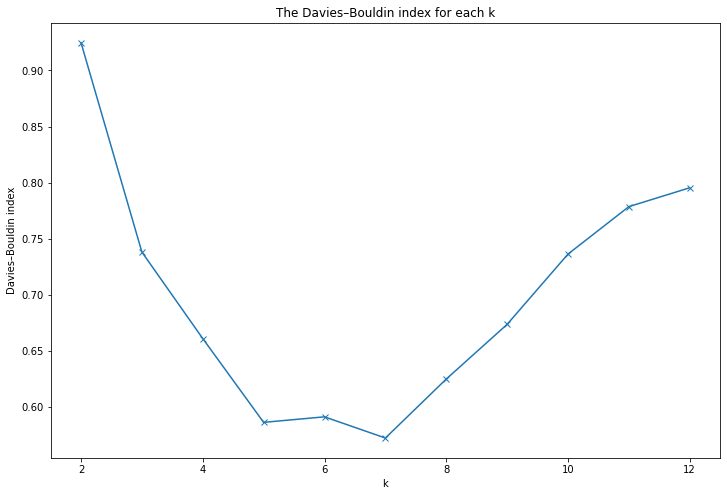

In [48]:
scores = []
for i in range(2, 13):
    model = KMedoids(n_clusters=i)
    model.fit(df)
    labels=model.labels_
    scores.append(davies_bouldin_score(df,labels))
plt.figure(figsize=(12,8))
x = list(range(2, 13))
plt.plot(x, scores, 'x-')
plt.xlabel('k')
plt.ylabel('Davies–Bouldin index')
plt.title('The Davies–Bouldin index for each k')
plt.show()

Używając indeksu Daviesa–Bouldina wychodzi nam, że 5 lub 7 klastrów jest najlepsze dla Kmedoids. Żeby dokonać wyboru potrzebowalibyśmy głębszego zrozumienia danych.